In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
df_small=pd.read_csv('/content/drive/MyDrive/DataSet/df_small.csv')

In [ ]:
contractions_dict={"'aight": 'alright',
 "ain't": 'is not',
 "amn't": 'am not',
 "aren't": 'are not',
 "can't": 'cannot',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "daren't": 'dare not',
 "daresn't": 'dare not',
 "dasn't": 'dare not',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 'dunno': 'do not know',
 "d'ye": 'do you',
 "e'er": 'ever',
 "everybody's": 'everybody is',
 "everyone's": 'everyone is',
 'finna': 'fixing',
 "g'day": 'good day',
 'gimme': 'give me',
 "giv'n": 'given',
 'gonna': 'going to',
 "gon't": 'go not',
 'gotta': 'got to',
 "hadn't": 'had not',
 "had've": 'had have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had',
 "he'll": 'he will',
 "he's": 'he is',
 "he've": 'he have',
 "how'd": 'how did',
 'howdy': 'how do you do',
 "how'll": 'how will',
 "how're": 'how are',
 "how's": 'how is',
 "i'd\ti": 'had',
 "i'd've": 'i would have',
 "i'll": 'i will',
 "i'm": 'i am',
 "i'm'a": 'i am about to',
 "i'm'o": 'i am going to',
 'innit': 'is it not',
 "i've": 'i have',
 "isn't": 'is not',
 "it'd": 'it would',
 "it'll": 'it will',
 "it's": 'it is',
 'iunno': 'i do not know',
 "let's": 'let us',
 "ma'am": 'madam',
 "mayn't": 'may not',
 "may've": 'may have',
 'methinks': 'me thinks',
 "mightn't": 'might not',
 "might've": 'might have',
 "mustn't": 'must not',
 "mustn't've": 'must not have',
 "must've": 'must have',
 "needn't": 'need not',
 "ne'er": 'never',
 "o'clock": 'of the clock',
 "o'er": 'over',
 "ol'": 'old',
 "oughtn't": 'ought not',
 "'s": 'is',
 "shalln't": 'shall not',
 "shan't": 'shall not',
 "she'd": 'she had',
 "she'll": 'she shall',
 "she's": 'she has',
 "should've": 'should have',
 "shouldn't": 'should not',
 "shouldn't've": 'should not have',
 "somebody's": 'somebody is',
 "someone's": 'someone is',
 "something's": 'something is',
 "so're": 'so are',
 "that'll": 'that will',
 "that're": 'that are',
 "that's": 'that is',
 "that'd": 'that would',
 "there'd": 'there would',
 "there'll": 'there will',
 "there're": 'there are',
 "there's": 'there is',
 "these're": 'these are',
 "these've": 'these have',
 "they'd": 'they would',
 "they'll": 'they will',
 "they're": 'they are',
 "they've": 'they have',
 "this's": 'this is',
 "those're": 'those are',
 "those've": 'those have',
 "'tis": 'it is',
 "to've": 'to have',
 "'twas": 'it was',
 'wanna': 'want to',
 "wasn't": 'was not',
 "we'd": 'we would',
 "we'd've": 'we would have',
 "we'll": 'we will',
 "we're": 'we are',
 "we've": 'we have',
 "weren't": 'were not',
 "what'd": 'what did',
 "what'll": 'what will',
 "what're": 'what are',
 "what's": 'what is',
 "what've": 'what have',
 "when's": 'when is',
 "where'd": 'where did',
 "where'll": 'where will',
 "where're": 'where are',
 "where's": 'where is',
 "where've": 'where have',
 "which'd": 'which would',
 "which'll": 'which will',
 "which're": 'which are',
 "which's": 'which is',
 "which've": 'which have',
 "who'd": 'who would',
 "who'd've": 'who would have',
 "who'll": 'who will',
 "who're": 'who are',
 "who's": 'who is',
 "who've": 'who have',
 "why'd": 'why did',
 "why're": 'why are',
 "why's": 'why is',
 "willn't": 'will not ',
 "won't": 'will not',
 'wonnot': 'will not ',
 "would've": 'would have',
 "wouldn't": 'would not',
 "wouldn't've": 'would not have',
 "y'all": 'you all ',
 "y'all'd've": 'you all would have ',
 "y'all're": 'you all are ',
 "you'd": 'you would',
 "you'll": 'you will',
 "you're": 'you are',
 "you've": 'you have'}

In [ ]:
import re
# Defining regex patterns.
urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)"
userPattern       = '@[^\s]+'
hashtagPattern    = '#[^\s]+'
alphaPattern      = "[^a-z0-9<>]"
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"

# Defining regex for emojis
smileemoji        = r"[8:=;]['`\-]?[)d]+"
sademoji          = r"[8:=;]['`\-]?\(+"
neutralemoji      = r"[8:=;]['`\-]?[\/|l*]"
lolemoji          = r"[8:=;]['`\-]?p+"

def preprocess_apply(tweet):

    tweet = tweet.lower()

    # Replace all URls with '<url>'
    tweet = re.sub(urlPattern, '<url>', tweet)

    # Replace @USERNAME to '<user>'.
    tweet = re.sub(userPattern, '<user>', tweet)

    # Replace all emojis.
    tweet = re.sub(r'<3', '<heart>', tweet)
    tweet = re.sub(smileemoji, '<smile>', tweet)
    tweet = re.sub(sademoji, '<sadface>', tweet)
    tweet = re.sub(neutralemoji, '<neutralface>', tweet)
    tweet = re.sub(lolemoji, '<lolface>', tweet)

    for contraction, replacement in contractions_dict.items():
        tweet = tweet.replace(contraction, replacement)

    # Remove non-alphanumeric and symbols
    tweet = re.sub(alphaPattern, ' ', tweet)

    # Adding space on either side of '/' to separate words (After replacing URLs).
    tweet = re.sub(r'/', ' / ', tweet)
    return tweet

# Apply the preprocessing function to the 'text' column of df_sample
df_small['text'] = df_small['text'].apply(preprocess_apply)

# Display the sampled DataFrame with processed text
df_small


,label,text
0,0,claire back on lost possibly eko and boone m...
1,0,why are you ugh
2,0,i miss france
3,0,my phone is jacked up i need a new batt i thi...
4,0,today is the worst day ever
...,...,...
29995,1,well that is good as long as you enjoyed you...
29996,1,i responded stupid cat is helping me type f...
29997,1,a few people asked about the next flossing wit...
29998,1,we had such an awesome visit this weekend with...


In [ ]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

nltk.download('punkt')

# Define a function to perform text preprocessing
def preprocess_text(text):
    # Remove URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+|\b\w+\.com\b|\b\w+\.org\b')
    text = url_pattern.sub('', text)

    # Remove usernames
    username_pattern = re.compile(r'@\w+')
    text = username_pattern.sub('', text)

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the processed words back into a text
    processed_text = ' '.join(words)

    return processed_text


# Apply preprocessing to the 'text' column
df_small['text'] = df_small['text'].apply(preprocess_text)

# Display the modified DataFrame
print(df_small)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


       label                                               text
0          0  claire back lost possibly eko boone maybe even...
1          0                                                ugh
2          0                                        miss france
3          0  phone jacked need new batt think really using ...
4          0                               today worst day ever
...      ...                                                ...
29995      1  well good long enjoyed worth loss twitter time...
29996      1    responded stupid cat helping type forgive error
29997      1  people asked next flossing bacon flossweekly h...
29998      1  awesome visit weekend rodis brother sister law...
29999      1  yesterday awesome later beach party hanne sven...

[30000 rows x 2 columns]


In [ ]:
df_small.shape

(30000, 2)

In [ ]:
df_small['label'].value_counts()

0    15000
1    15000
Name: label, dtype: int64

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Separate the data into two dataframes for each label
df_label_0 = df_small[df_small['label'] == 0]
df_label_1 = df_small[df_small['label'] == 1]

# Create training, test, and validation datasets for each label
train_label_0, temp_label_0 = train_test_split(df_label_0, test_size=5000, random_state=42)
test_label_0, validation_label_0 = train_test_split(temp_label_0, test_size=2500, random_state=42)

train_label_1, temp_label_1 = train_test_split(df_label_1, test_size=5000, random_state=42)
test_label_1, validation_label_1 = train_test_split(temp_label_1, test_size=2500, random_state=42)

# Combine the dataframes to create the final training, test, and validation datasets
train_set = pd.concat([train_label_0, train_label_1], axis=0)
test_set = pd.concat([test_label_0, test_label_1], axis=0)
validation_set = pd.concat([validation_label_0, validation_label_1], axis=0)

# Shuffle the datasets
train_set = train_set.sample(frac=1, random_state=42).reset_index(drop=True)
test_set = test_set.sample(frac=1, random_state=42).reset_index(drop=True)
validation_set = validation_set.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
print(train_set.shape)
print(train_set['label'].value_counts())

(20000, 2)
1    10000
0    10000
Name: label, dtype: int64


In [ ]:
print(test_set.shape)
print(test_set['label'].value_counts())

(5000, 2)
0    2500
1    2500
Name: label, dtype: int64


In [ ]:
print(validation_set.shape)
print(validation_set['label'].value_counts())

(5000, 2)
0    2500
1    2500
Name: label, dtype: int64


In [ ]:
!pip install torchtext==0.6.0

Bidirectional-RNN

In [ ]:
import torch
from torch import nn
from torch import optim
from torchtext import data
from torch.nn.utils import clip_grad_norm_
from torchtext import datasets
import pandas as pd

# Define the Field objects for text and labels
TEXT = data.Field(sequential=True, batch_first=True, lower=True)
LABEL = data.LabelField()

# Convert dataframes to list of dictionaries
train_examples = [data.Example.fromlist([text, label], fields=[('text', TEXT), ('label', LABEL)]) for text, label in zip(train_set['text'], train_set['label'])]
test_examples = [data.Example.fromlist([text, label], fields=[('text', TEXT), ('label', LABEL)]) for text, label in zip(test_set['text'], test_set['label'])]
validation_examples = [data.Example.fromlist([text, label], fields=[('text', TEXT), ('label', LABEL)]) for text, label in zip(validation_set['text'], validation_set['label'])]

# Create your dataset
train_data = data.Dataset(train_examples, fields=[('text', TEXT), ('label', LABEL)])
test_data = data.Dataset(test_examples, fields=[('text', TEXT), ('label', LABEL)])
validation_data = data.Dataset(validation_examples, fields=[('text', TEXT), ('label', LABEL)])

# Build vocabulary using pre-trained word vectors
TEXT.build_vocab(train_data, max_size=10000, vectors='glove.6B.100d')
LABEL.build_vocab(train_data)

train_iterator, test_iterator, validation_iterator = data.BucketIterator.splits(
    (train_data, test_data, validation_data),
    batch_size=32,
    sort=False,
    shuffle=False
)


In [ ]:
# Define train and evaluate functions
def train(model, iterator, optimizer, criterion, max_norm):
    model.train()
    total_loss = 0
    total_correct = 0

    for batch in iterator:
        optimizer.zero_grad()
        text, labels = batch.text, batch.label
        predictions = model(text).squeeze(1)
        loss = criterion(predictions, labels)
        loss.backward()

        # Apply gradient clipping
        clip_grad_norm_(model.parameters(), max_norm)

        optimizer.step()
        total_loss += loss.item()

        # Calculate accuracy
        predicted_labels = predictions.argmax(1)
        total_correct += (predicted_labels == labels).sum().item()

    return total_loss / len(iterator), total_correct / len(iterator.dataset)


def evaluate(model, iterator, criterion):
    model.eval()
    total_loss = 0
    total_correct = 0

    with torch.no_grad():
        for batch in iterator:
            text, labels = batch.text, batch.label
            predictions = model(text).squeeze(1)
            loss = criterion(predictions, labels)
            total_loss += loss.item()

            # Calculate accuracy
            predicted_labels = predictions.argmax(1)
            total_correct += (predicted_labels == labels).sum().item()

    return total_loss / len(iterator), total_correct / len(iterator.dataset)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score
import torch.nn as nn

class RNNClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, label_size, padding_idx,dropout):
        super(RNNClassifier, self).__init__()
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.label_size = label_size
        self.num_layers = 2
        self.num_directions = 2  # Bidirectional

        # Add the layers required for sentiment analysis.
        self.embedding = nn.Embedding(self.vocab_size, self.embedding_dim, padding_idx=padding_idx)
        self.rnn = nn.RNN(self.embedding_dim, self.hidden_dim, num_layers=self.num_layers, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(self.hidden_dim * self.num_directions, self.label_size)

    def forward(self, text):
        embedded = self.embedding(text)
        output, _ = self.rnn(embedded)
        # Concatenate the forward and backward hidden states and take the output from the last time step
        last_output = output[:, -1, :]
        last_output = self.dropout(last_output)
        return self.fc(last_output)

# Define hyperparameters
vocab_size = len(TEXT.vocab)
label_size = len(LABEL.vocab)
padding_idx = TEXT.vocab.stoi['<pad>']
embedding_dim = 128
hidden_dim = 128
dropout = 0.5
weight_decay = 1e-5

# Create the model
model = RNNClassifier(vocab_size, embedding_dim, hidden_dim, label_size, padding_idx, dropout)

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), weight_decay=weight_decay)
criterion = nn.CrossEntropyLoss()

# Gradient clipping value
max_norm = 0.05

# Train the model
NUM_EPOCHS = 10
best_val_loss = float('inf')

for epoch in range(NUM_EPOCHS):
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, max_norm)
    val_loss, val_acc = evaluate(model, validation_iterator, criterion)

    print(f'Epoch: {epoch + 1:02}')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc * 100:.2f}%')
    print(f'\tVal. Loss: {val_loss:.3f} | Val. Acc: {val_acc * 100:.2f}%')

    # Save the best model based on validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pt')

# Load the best model for evaluation
model.load_state_dict(torch.load('best_model.pt'))

# Evaluate on the test set
test_loss, test_acc = evaluate(model, test_iterator, criterion)

# Set the model in evaluation mode
model.eval()

# Initialize empty lists to store ground truth labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test set and make predictions
with torch.no_grad():
    for batch in test_iterator:
        text, labels = batch
        predictions = model(text).squeeze(1)
        predicted_labels.extend(predictions.argmax(dim=1).tolist())
        true_labels.extend(labels.tolist())

# Calculate the F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc * 100:.2f}% | F1 Score: {f1:.2f}')


Epoch: 01
	Train Loss: 0.698 | Train Acc: 50.46%
	Val. Loss: 0.697 | Val. Acc: 49.66%
Epoch: 02
	Train Loss: 0.656 | Train Acc: 62.76%
	Val. Loss: 0.616 | Val. Acc: 66.84%
Epoch: 03
	Train Loss: 0.588 | Train Acc: 71.11%
	Val. Loss: 0.594 | Val. Acc: 69.46%
Epoch: 04
	Train Loss: 0.534 | Train Acc: 75.60%
	Val. Loss: 0.589 | Val. Acc: 70.44%
Epoch: 05
	Train Loss: 0.508 | Train Acc: 77.67%
	Val. Loss: 0.577 | Val. Acc: 70.36%
Epoch: 06
	Train Loss: 0.479 | Train Acc: 79.75%
	Val. Loss: 0.610 | Val. Acc: 69.12%
Epoch: 07
	Train Loss: 0.466 | Train Acc: 80.92%
	Val. Loss: 0.589 | Val. Acc: 71.20%
Epoch: 08
	Train Loss: 0.454 | Train Acc: 81.59%
	Val. Loss: 0.580 | Val. Acc: 70.78%
Epoch: 09
	Train Loss: 0.446 | Train Acc: 81.85%
	Val. Loss: 0.602 | Val. Acc: 70.80%
Epoch: 10
	Train Loss: 0.439 | Train Acc: 82.30%
	Val. Loss: 0.606 | Val. Acc: 71.06%
Test Loss: 0.564 | Test Acc: 71.60% | F1 Score: 0.72


Confusion Matrix:
[[1835  665]
 [ 755 1745]]


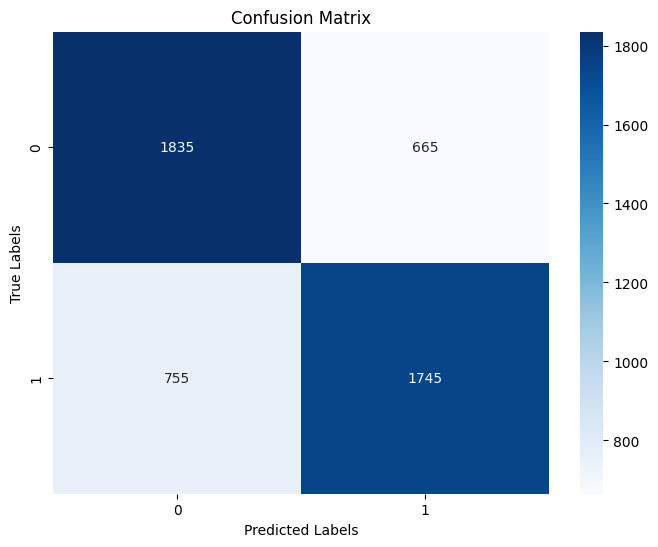

Test Loss: 0.564 | Test Acc: 71.60% | F1 Score: 0.72


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Calculate the F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc * 100:.2f}% | F1 Score: {f1:.2f}')
